In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')
len(df)

20640

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

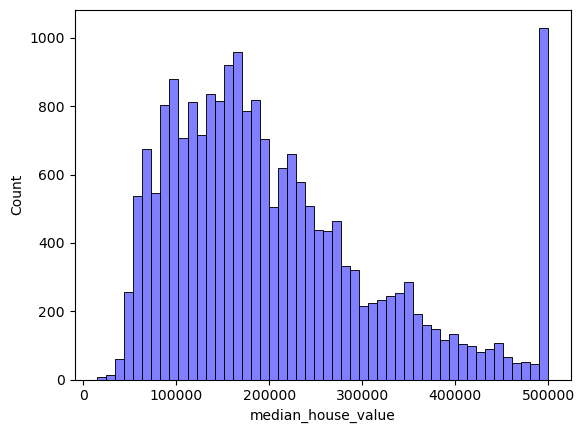

In [6]:
sns.histplot(df.median_house_value, bins=50, color='blue', alpha=0.5)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

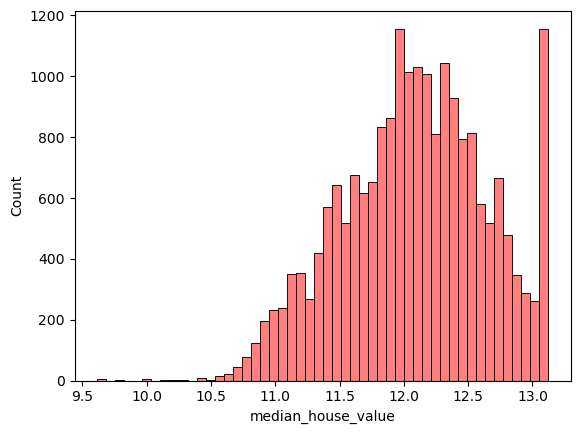

In [7]:
sns.histplot(np.log1p(df.median_house_value), bins=50, color='red', alpha=0.5)

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.population.median()

1166.0

In [10]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [11]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [12]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [14]:
def prepare_X(df, missing_val):
    df_num = df[base]
    df_num = df_num.fillna(missing_val)
    X = df_num.values
    return X

In [15]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [16]:
for missing_val in [0, int(df['total_bedrooms'].mean())]:
    X_train = prepare_X(df_train, missing_val)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    print('rmse score with missing value', missing_val, ': ', round(rmse(y_train, y_pred),2))

rmse score with missing value 0 :  0.34
rmse score with missing value 537 :  0.34


In [17]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [18]:
def prepare_X_with_zero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [19]:
X_train = prepare_X_with_zero(df_train)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w_0 + X_train.dot(w)
    print('rmse score for ', r, ':',rmse(y_train, y_pred))

rmse score for  0 : 0.3413135910156676
rmse score for  1e-06 : 0.3413135910156898
rmse score for  0.0001 : 0.34131359123782007
rmse score for  0.001 : 0.34131361317607767
rmse score for  0.01 : 0.341315753302291
rmse score for  0.1 : 0.34148530628635504
rmse score for  1 : 0.3452327944054412
rmse score for  5 : 0.3501642987136917
rmse score for  10 : 0.3513878391350454


In [20]:
def use_random_seed(x):
    np.random.seed(x)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [21]:
score = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = use_random_seed(seed)
    X_train = prepare_X_with_zero(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X_with_zero(df_val)
    y_pred = w_0 + X_val.dot(w)
    score.append(rmse(y_val, y_pred))
    
score
print('standard_deviation: ', round(np.std(score),3))

standard_deviation:  0.004


In [22]:
df_train, df_val, df_test, y_train, y_val, y_test = use_random_seed(9)
df_combine = pd.concat([df_train, df_val])
X_combine = prepare_X_with_zero(df_combine)
X_test = prepare_X_with_zero(df_test)
y_combine = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_combine, y_combine, r=0.001)
y_pred = w_0 + X_test.dot(w)
print('rmse score for: ',rmse(y_test, y_pred))

rmse score for:  0.34531689143895133
